In [13]:
from abc import ABCMeta, abstractmethod
from dataclasses import dataclass
from typing import Optional
import matplotlib.pyplot as plt
import pandas as pd
from os import path
import itertools as it


@dataclass
class LossHistory:
    filename: str
    delimiter: str
    resolution: int

    def data(self) -> pd.DataFrame:
        return pd.read_csv(self.filename, delimiter=self.delimiter)

    def experiment_name(self) -> str:
        return path.basename(path.dirname(self.filename))


class LossHistoryV1 (LossHistory):
    def __init__(self, filename: str):
        super().__init__(filename, ' ', 10)


class LossHistoryV2(LossHistory):
    def __init__(self, filename: str, resolution: int = 10):
        super().__init__(filename, ';', resolution)


loss_csvs: list[LossHistory] = [
    # LossHistoryV1(
    #     '/home/aq85800/NewVolume/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/teapot+box+blackbg+200mocap/loss_history.csv'),
    # LossHistoryV2('/home/aq85800/NewVolume/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/teapot+box+blackbg+200mocap_losslogger/loss_history.csv', resolution=1),
    # LossHistoryV2('/home/aq85800/NewVolume/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/teapot+box+blackbg+200mocap_lossdict/loss_history.csv'),
    LossHistoryV2('/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/teapot+box+blackbg+200mocap_lossdict+emalog/loss_history.csv'),
    LossHistoryV2('/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/teapot+box+noobject+blackbg+200mocap_profile/loss_history.csv'),
    LossHistoryV2("/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/cloud+0transp+blackbg+200mocap+boguspoints/loss_history.csv"),
    LossHistoryV2("/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/cloud+0transp+noobject+blackbg+200mocap_boguspoints/loss_history.csv"),
    LossHistoryV2("/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/cloud+0transp+blackbg+200mocap_blenderpoints3d_profile/loss_history.csv"),
]

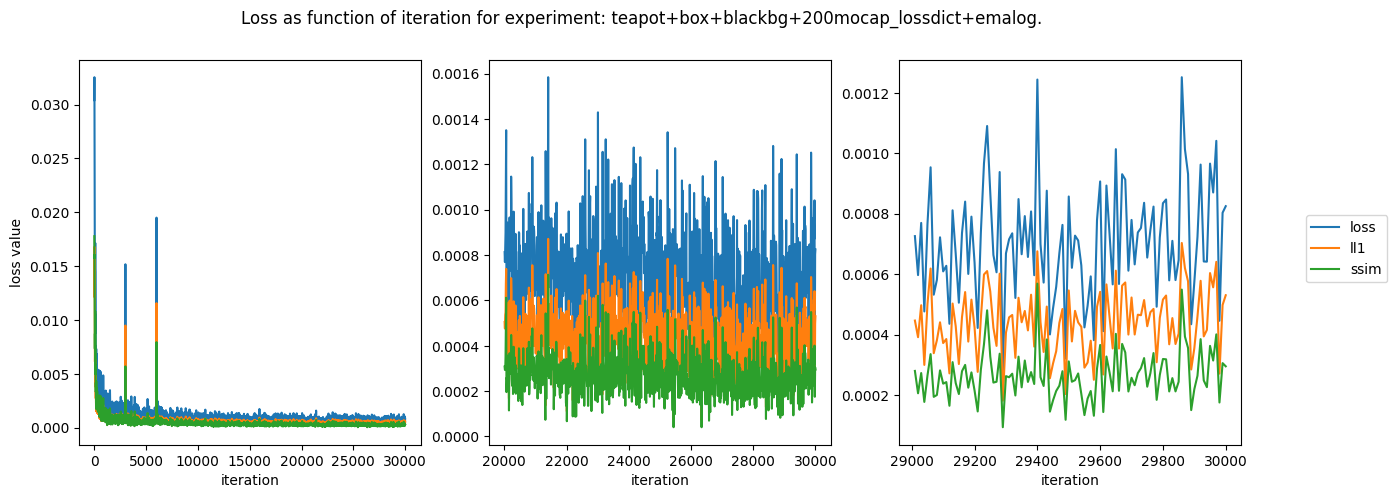

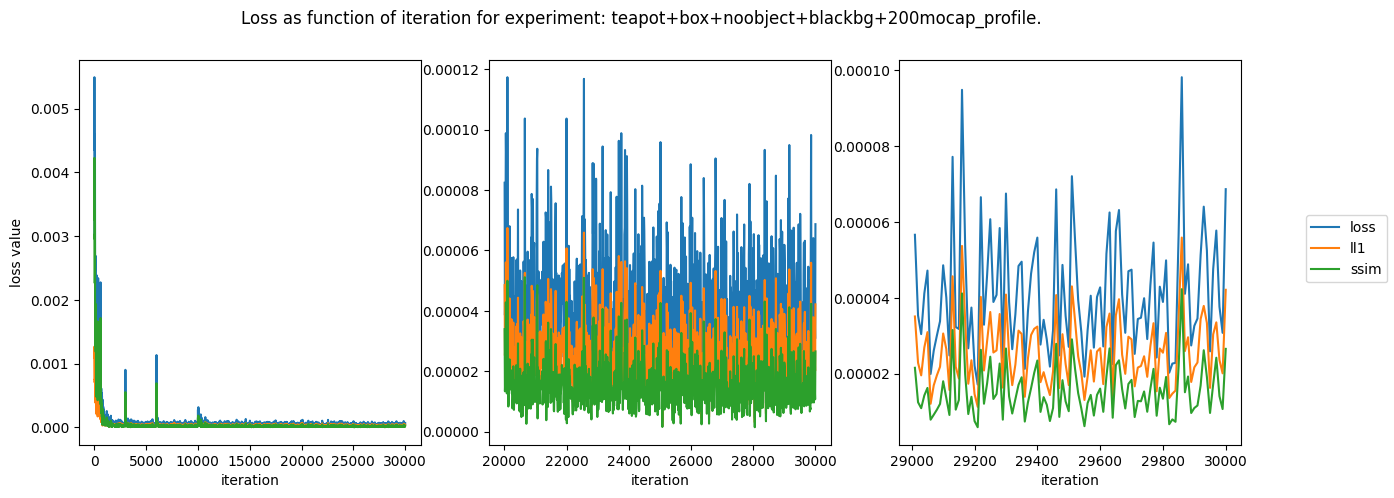

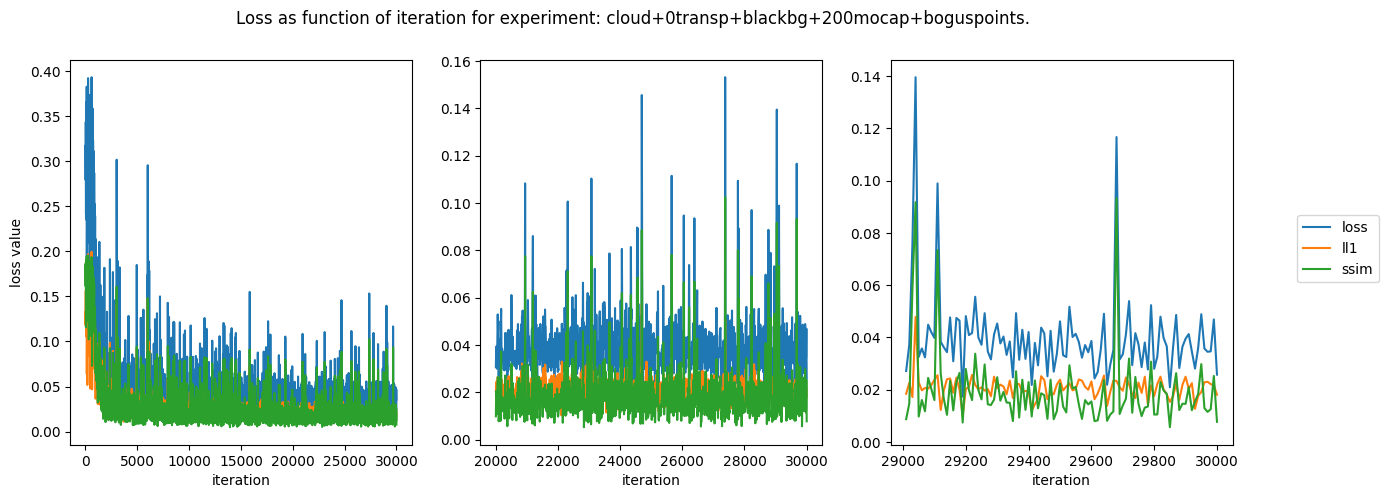

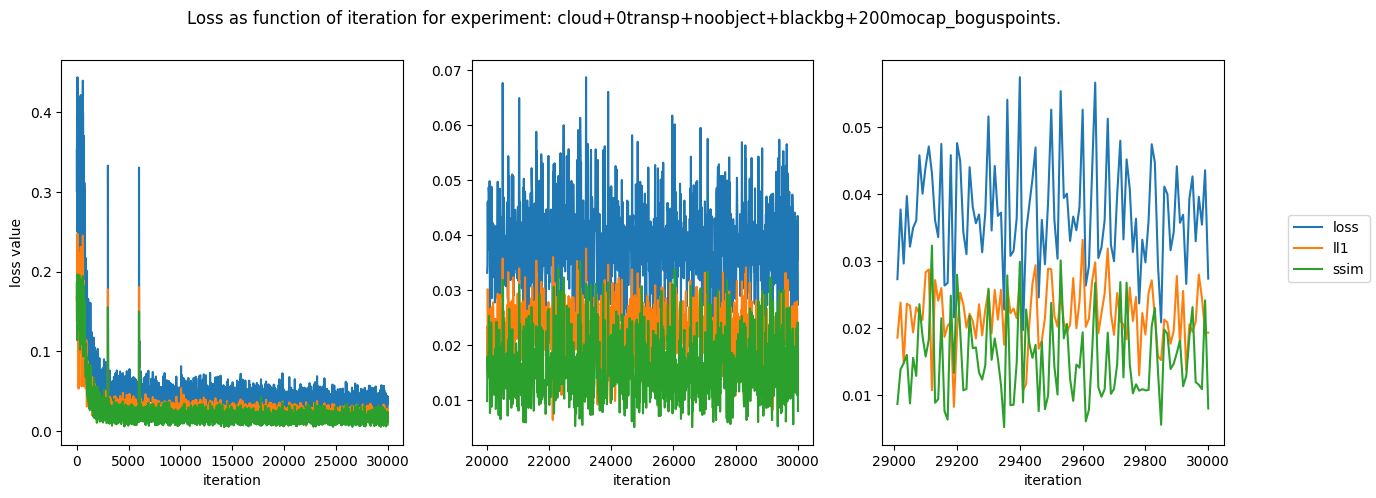

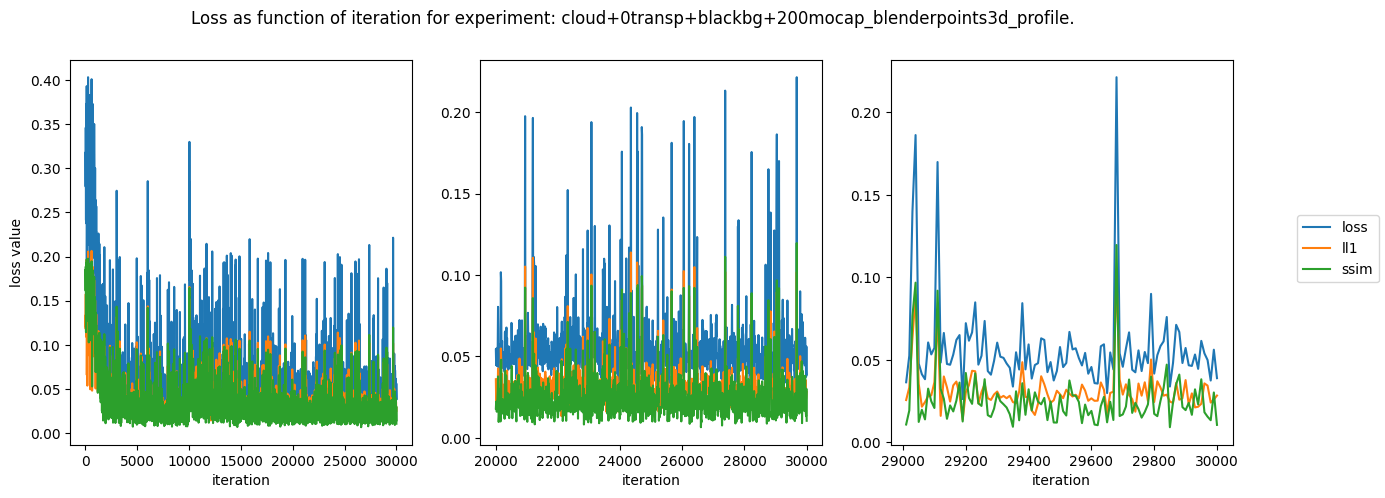

In [14]:
for csv in loss_csvs:
    fig, axs = plt.subplots(1,3,figsize=(15, 5))
    fig.suptitle(f"Loss as function of iteration for experiment: {csv.experiment_name()}.")
    axs[0].set_ylabel('loss value')
    data = csv.data()
    for i,tail in enumerate([30000, 10000, 1000]):
        tail_resolution = tail // csv.resolution
        axs[i].set_xlabel('iteration')
        if 'loss_name' not in data.columns:
            axs[i].plot(data['iteration'].tail(tail_resolution), data['loss'].tail(tail_resolution))
        else:
            for name in data['loss_name'].unique():
                loss_name_mask = data['loss_name'] == name
                loss_name_data = data[loss_name_mask]
                axs[i].plot(loss_name_data['iteration'].tail(tail_resolution), loss_name_data['loss'].tail(tail_resolution), label=name)
    if 'loss_name' in data.columns:
        unique = data['loss_name'].unique()
        if len(unique) > 1:
            fig.legend(labels=unique, loc='center right')
    fig.show()

In [15]:
# from math import lcm

# for csv in loss_csvs[1:]:
#     refdata = loss_csvs[0].data()
#     if 'loss_name' in refdata.columns:
#         refdata = refdata[refdata['loss_name'] == 'loss']
#     data = csv.data()
#     if 'loss_name' in data.columns:
#         data = data[data['loss_name'] == 'loss']

#     common_sample_granularity = lcm(csv.resolution, loss_csvs[0].resolution)
#     if csv.resolution < loss_csvs[0].resolution:
#         resolution_mask = data['iteration'] % common_sample_granularity == 0
#         data = data[resolution_mask]
#     else:
#         resolution_mask = refdata['iteration'] % common_sample_granularity == 0
#         refdata = refdata[resolution_mask]
#     delta_loss = data['loss'].reset_index(drop=True) - refdata['loss'].reset_index(drop=True)
#     fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#     fig.suptitle(
#         f"Loss difference beween experiments {csv.experiment_name()} and {loss_csvs[0].experiment_name()} as a function of iteration.")
#     axs[0].set_ylabel('delta loss')
#     for i, tail in enumerate([30000, 10000, 1000]):
#         tail_resolution = tail // common_sample_granularity
#         axs[i].set_xlabel('iteration')
#         axs[i].plot(data['iteration'].tail(tail_resolution),
#                     delta_loss.tail(tail_resolution))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.50000983..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.25088897..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17779839..0.999887].
/home/aq85800/anaconda3/envs/plotenv/lib/python3.12/site-packages/skimage/metrics/_structural_similarity.py:269: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.43068781..0.9998039].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00011731628..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for in

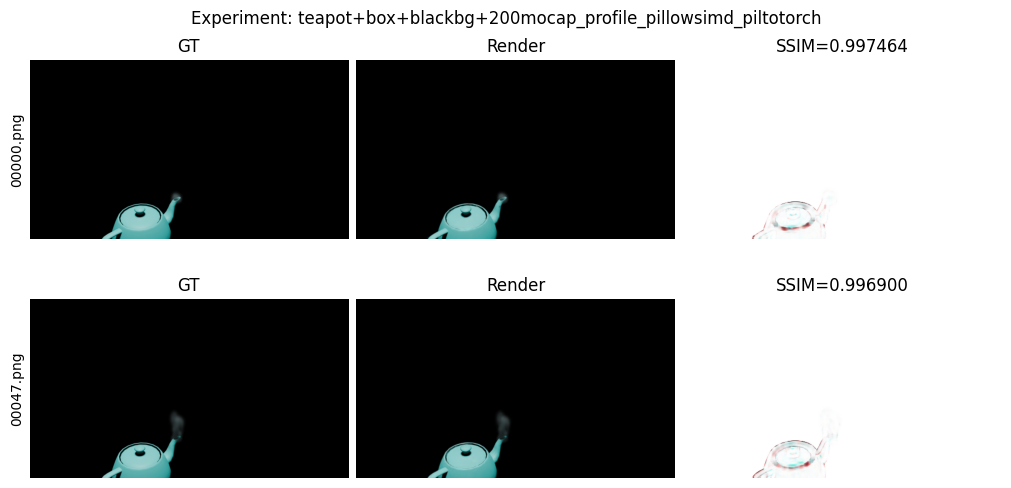

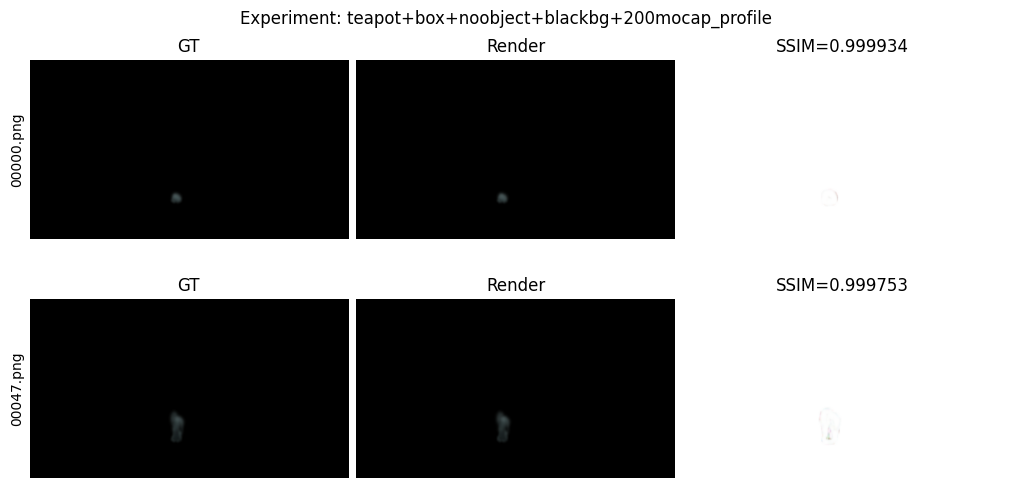

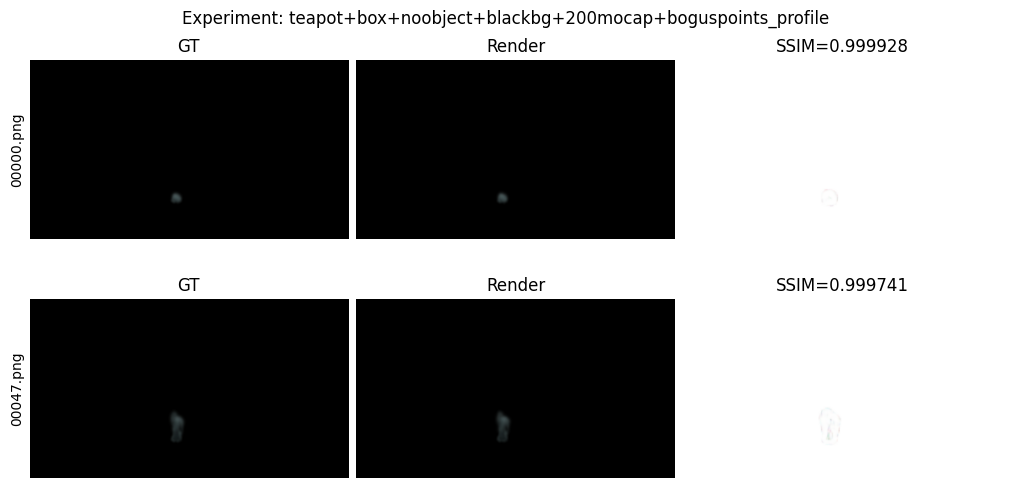

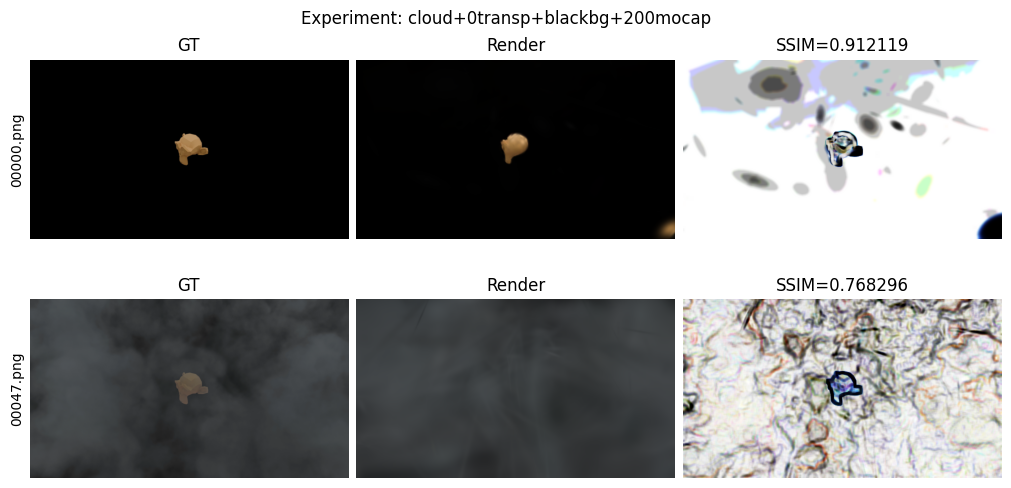

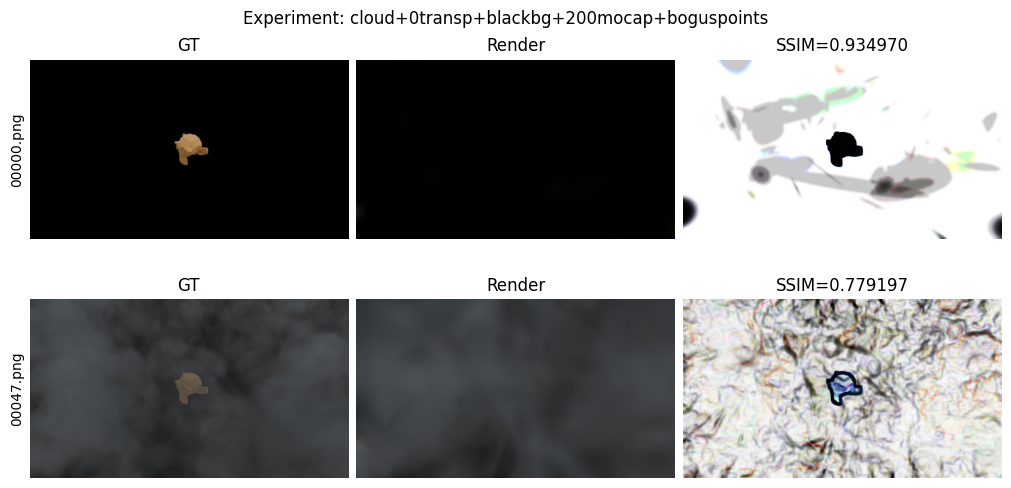

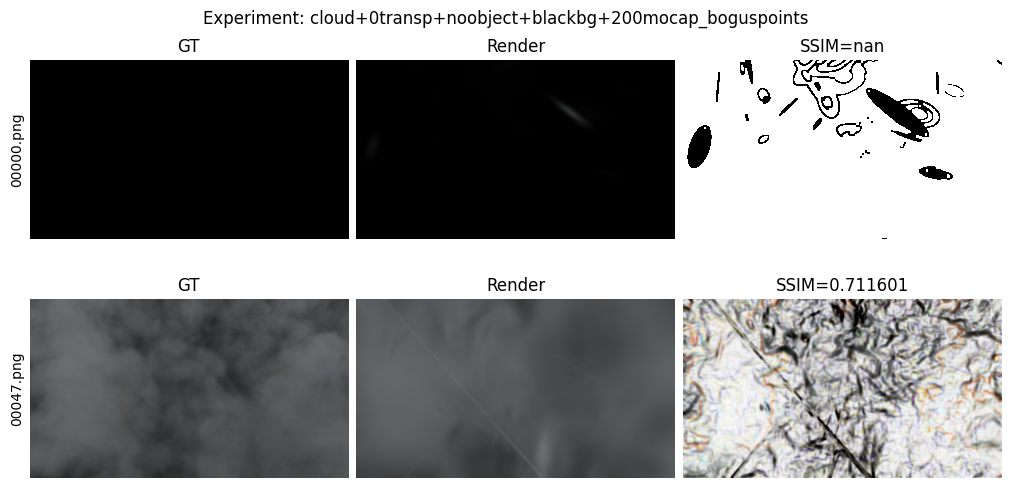

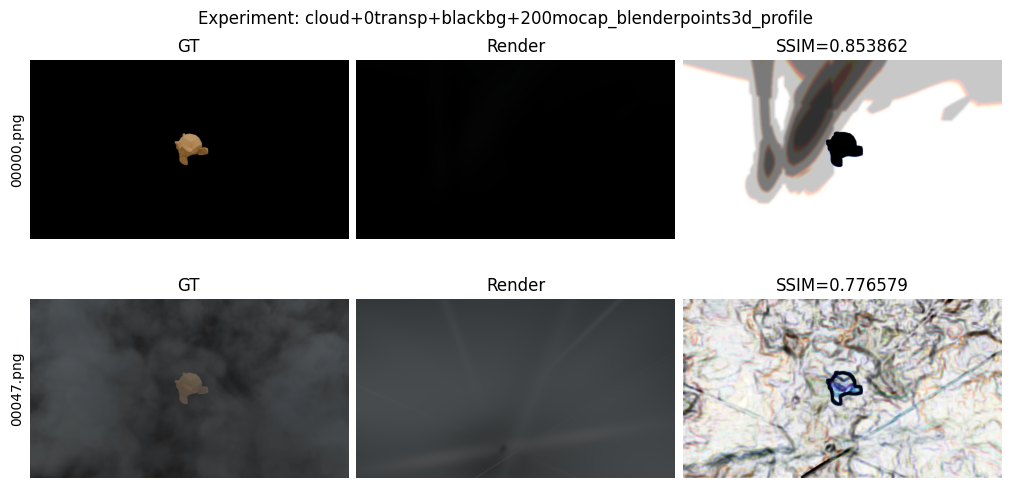

In [16]:
from pathlib import Path
from matplotlib.axes import Axes
from matplotlib.figure import SubFigure
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

for exppath in (Path(p) for p in (
    "/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/teapot+box+blackbg+200mocap_profile_pillowsimd_piltotorch",
    "/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/teapot+box+noobject+blackbg+200mocap_profile",
    "/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/teapot+box+noobject+blackbg+200mocap+boguspoints_profile",
    "/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/cloud+0transp+blackbg+200mocap",
    "/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/cloud+0transp+blackbg+200mocap+boguspoints",
    "/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/cloud+0transp+noobject+blackbg+200mocap_boguspoints",
    "/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/cloud+0transp+blackbg+200mocap_blenderpoints3d_profile",
)):
    fig = plt.figure(layout='constrained', figsize=(10,5))
    fig.suptitle(f"Experiment: {exppath.name}")
    rows = fig.subfigures(nrows=2, ncols=1)
    row: SubFigure
    for row, imname in zip(rows, ["00000.png", "00047.png"]):
        axs: list[Axes] = row.subplots(nrows=1, ncols=3)
        gt, render = (plt.imread(exppath/"test"/"ours_30000"/p/imname) for p in ("gt","renders"))
        ssim_metrics, ssim_image = ssim(gt, render, channel_axis=2, data_range=gt.max() - gt.min(), full=True)
        # set label of the first column to 'imname'
        for ax in axs:
            ax.set_xticks([])
            ax.set_yticks([]) 
            
            plt.setp(ax.spines.values(), color=None)
        axs[0].set_ylabel(imname)
        # set axis off, but show labels
        for ax, title, image in zip(axs, ["GT", "Render", f"SSIM={ssim_metrics:.6f}"], [gt, render, ssim_image]):
            ax.set_title(title)
            ax.imshow(image)

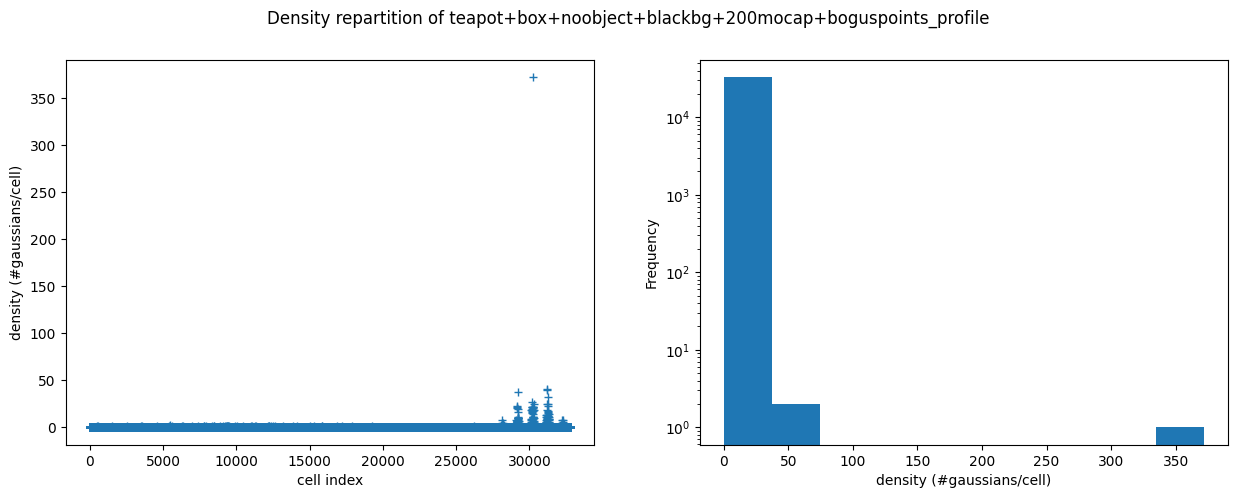

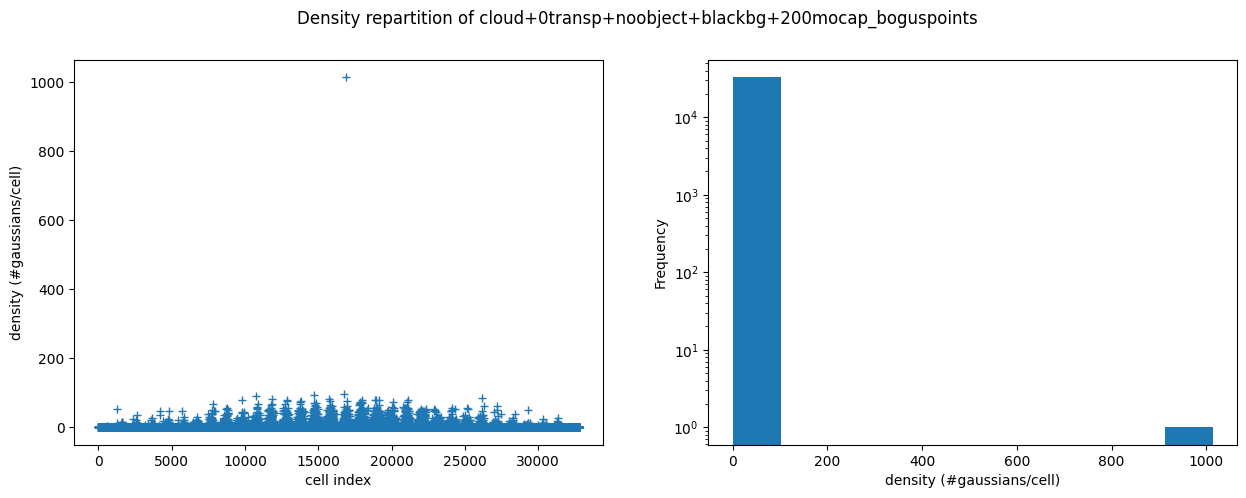

In [17]:
import json
from pathlib import Path
from typing import Literal

from matplotlib.axes import Axes


def density_histogram(fname: str):
    with open(fname, 'r') as f:
        data = json.load(f)
    axs: tuple[Axes, ...]
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    plot, hist = axs

    # plot.set_yscale('log',base=10)
    plot.set_ylabel('density (#gaussians/cell)')
    plot.set_xlabel('cell index')
    plot.plot(range(len(data['densities'])), data['densities'], '+')

    hist.set_yscale('log', base=10)
    hist.set_ylabel("Frequency")
    hist.set_xlabel('density (#gaussians/cell)')
    hist.hist(data['densities'])

    expname = path.basename(path.dirname(fname))
    fig.suptitle(f"Density repartition of {expname}")
    fig.show()


for f in (
    "/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/teapot+box+noobject+blackbg+200mocap+boguspoints_profile/density.json",
    "/mnt/NewVolume/aq85800/SpacetimeGaussians/output_blender_prior/techni_lite_noprior48/cloud+0transp+noobject+blackbg+200mocap_boguspoints/density.json",
):
    density_histogram(f)